In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data
food_df = pd.read_csv("food_dely.csv")
print(food_df[["name","city","price_range","average_cost_for_two"]].head(10))

                             name  city  price_range  average_cost_for_two
0                     Bikanervala  Agra            2                   700
1  Mama Chicken Mama Franky House  Agra            2                   600
2                   Bhagat Halwai  Agra            1                   300
3                   Bhagat Halwai  Agra            1                   300
4     The Salt Cafe Kitchen & Bar  Agra            3                  1000
5                   Dominos Pizza  Agra            2                   400
6             Honeydew Restaurant  Agra            2                   500
7                   Dominos Pizza  Agra            2                   400
8                      Cake House  Agra            2                   500
9                   Sugar N Thyme  Agra            3                  1000


In [35]:
# Inspect basic info
food_df.info()
print(food_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         207117 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [36]:
# handle missing values for imp field
food_df["establishment"] = food_df["establishment"].fillna(
    food_df["establishment"].mode()[0]).astype("string")
food_df["cuisines"] = food_df["cuisines"].fillna(
    food_df["cuisines"].ffill())
food_df["highlights"] = food_df["highlights"].fillna(
    food_df["highlights"].ffill())
food_df["name"] = food_df["name"].astype("string")
food_df["city"] = food_df["city"].astype("string")
food_df['cuisines'] = food_df['cuisines'].apply(
    lambda x: [c.strip() for c in x.split(',')])
food_df.rename(columns={'country_id': 'country'}, inplace=True)
food_df['country'] = food_df['country'].map({1: "India"}).astype("string")
print(food_df.isnull().sum())

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country                      0
locality_verbose             0
cuisines                     0
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64


In [37]:
#inspect average_cost_for_two field
print(food_df['average_cost_for_two'].describe())

count    211944.000000
mean        595.812229
std         606.239363
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max       30000.000000
Name: average_cost_for_two, dtype: float64


In [27]:

# min price cannot be 0.
# For price_range 1 setting the average_cost_for_two to 50, if average_cost_for_two is < 20
food_df.loc[(food_df["price_range"] == 1) & (
    food_df["average_cost_for_two"] <= 20), "average_cost_for_two"] = 50

print(food_df['average_cost_for_two'].describe())

count    211944.000000
mean        596.306005
std         605.774118
min          30.000000
25%         250.000000
50%         400.000000
75%         700.000000
max       30000.000000
Name: average_cost_for_two, dtype: float64


In [28]:
#inspect avg rating
print(food_df['aggregate_rating'].describe())

count    211944.000000
mean          3.395937
std           1.283642
min           0.000000
25%           3.300000
50%           3.800000
75%           4.100000
max           4.900000
Name: aggregate_rating, dtype: float64


In [30]:
# aggregate_rating cannot be 0, so replacing that with mean value
food_df['aggregate_rating'] = food_df['aggregate_rating'].replace(0, np.nan)
food_df['aggregate_rating'] = food_df['aggregate_rating'].fillna(
    food_df['aggregate_rating'].mean())
print(food_df['aggregate_rating'].describe())

count    211944.000000
mean          3.818983
std           0.459448
min           1.800000
25%           3.600000
50%           3.818983
75%           4.100000
max           4.900000
Name: aggregate_rating, dtype: float64


In [40]:
# created a new column called region
# tried for few of the cities, rest made it 'other' 

city_to_region = {
    'Agra': 'North',
    'Ahmedabad': 'West',
    'Gandhinagar': 'West',
    'Ajmer': 'North',
    'Alappuzha': 'South',
    'Allahabad': 'North',
    'Amravati': 'West',
    'Amritsar': 'North',
    'Aurangabad': 'West',
    'Bangalore': 'South',
    'Bhopal': 'Central',
    'Bhubaneshwar': 'East',
    'Chandigarh': 'North',
    'Mohali': 'North',
    'Panchkula': 'North',
    'Zirakpur': 'North',
    'Nayagaon': 'North',
    'Chennai': 'South',
    'Coimbatore': 'South',
    'Cuttack': 'East',
    'Darjeeling': 'East',
    'Dehradun': 'North',
    'New Delhi': 'North',
    'Gurgaon': 'North',
    'Noida': 'North',
    'Faridabad': 'North',
    'Ghaziabad': 'North',
    'Greater Noida': 'North',
    'Dharamshala': 'North',
    'Gangtok': 'East',
    'Goa': 'West'}

food_df['region'] = food_df['city'].map(city_to_region)
# If mapping misses some, fill with 'Other'
food_df['region'] = food_df['region'].fillna('Other')
print(food_df[["name","city","average_cost_for_two","region"]].head(10))

                             name  city  average_cost_for_two region
0                     Bikanervala  Agra                   700  North
1  Mama Chicken Mama Franky House  Agra                   600  North
2                   Bhagat Halwai  Agra                   300  North
3                   Bhagat Halwai  Agra                   300  North
4     The Salt Cafe Kitchen & Bar  Agra                  1000  North
5                   Dominos Pizza  Agra                   400  North
6             Honeydew Restaurant  Agra                   500  North
7                   Dominos Pizza  Agra                   400  North
8                      Cake House  Agra                   500  North
9                   Sugar N Thyme  Agra                  1000  North


In [42]:
#storing the cleaned data to new csv
food_df.to_csv('post_cleaning.csv', index=False)
print('Cleaned data saved to csv')

Cleaned data saved to csv


In [44]:
#printing top 10 restaurants by rating

top = food_df.sort_values('aggregate_rating', ascending=False).head(10)
print(top[['name','city','aggregate_rating','votes']])

                               name        city  aggregate_rating  votes
82380    Kebabsville - Sayaji Hotel      Indore               4.9   1346
86876                         Arbab      Jaipur               4.9     75
1408    The Salt Cafe Kitchen & Bar        Agra               4.9    470
86874          The Barbeque Company      Jaipur               4.9    394
86873                         Chool      Jaipur               4.9    804
126416                      Zaitoon     Madurai               4.9    523
31076             Milkshake and Co.  Chandigarh               4.9    937
102919                     Cafe 651     Jodhpur               4.9    367
23491      ABs - Absolute Barbecues   Bangalore               4.9   7219
43120                       Bhangra     Chennai               4.9   1668


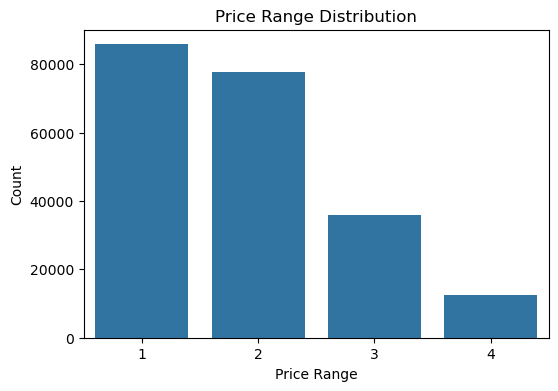

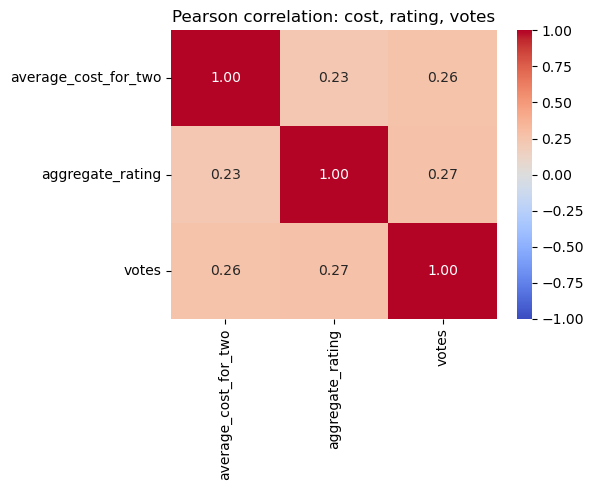

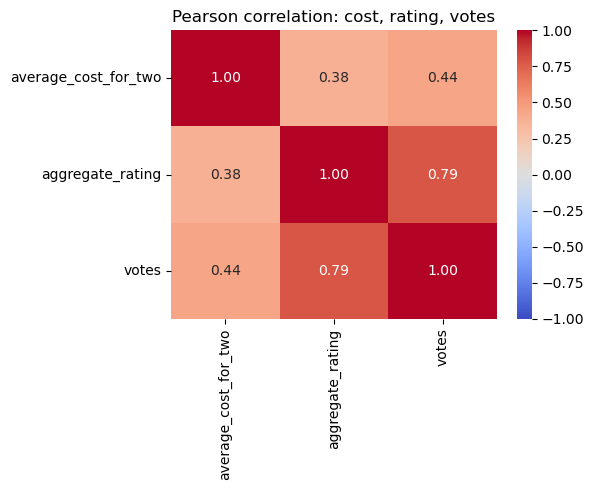

In [45]:
# Distribution of price ranges
plt.figure(figsize=(6,4))
sns.countplot(x='price_range', data=food_df)
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

cols = ['average_cost_for_two', 'aggregate_rating', 'votes']
df_corr = food_df[cols].copy()
df_corr['votes'] = food_df['votes'].replace(0, np.nan)
df_corr['votes'] = df_corr['votes'].dropna()

#Compute correlations
pearson_corr = df_corr.corr(method='pearson')
spearman_corr = df_corr.corr(method='spearman')

#Correlation heatmap (Pearson)
plt.figure(figsize=(6,5))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson correlation: cost, rating, votes")
plt.tight_layout()
plt.show()

#Correlation heatmap (spearman)
plt.figure(figsize=(6,5))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson correlation: cost, rating, votes")
plt.tight_layout()
plt.show()